In [1]:
import os 
from general_plot import *

model_name = model_name_list[0] 


[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [1 2 3 4 5]
u_random: [   9   81  513 3321]


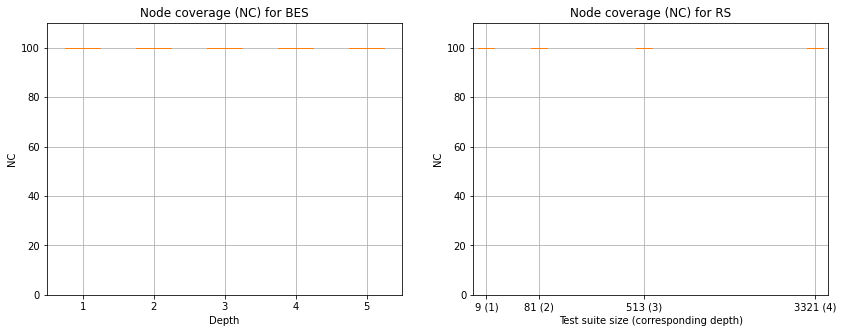

In [2]:

# repeat multi_times for each model and for each loopOpt
# init
loopOpt = False

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
data_map = {
    'need_positions' : True,
    'need_y_limit' : True,

    'need_xtick' : False, 
    
    'positions' : [1, 3, 7, 13.5],

    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),
    
    'bes_title': 'Node coverage (NC) for BES',
    'rand_title': 'Node coverage (NC) for RS',

    'x_bes_label': 'Depth',
    'x_rand_label': 'Test suite size (corresponding depth)',
    
#     'x_bes_lim' : 100,
#     'x_rand_lim' : 100,

    'box_width_bes' : 0.3,
    'box_width_rand' : 0.6,
    
    'y_bes_label': 'NC',
    'y_rand_label': 'NC',

    'y_bes_lim' : 110,
    'y_rand_lim' : 110,
    
    'width_bes_ratio': 1,
    'width_rand_ratio': 1,

    'distance_to_figures': 1
}

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, data_map)
    

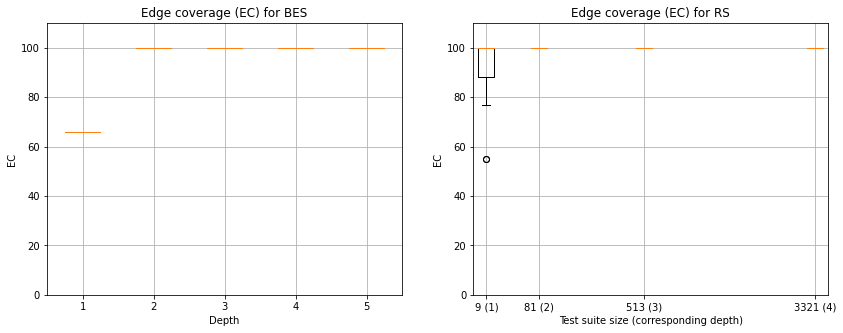

In [3]:
# ec 
coverage = 'EC'
data_map['bes_title'] = f'Edge coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Edge coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, data_map)



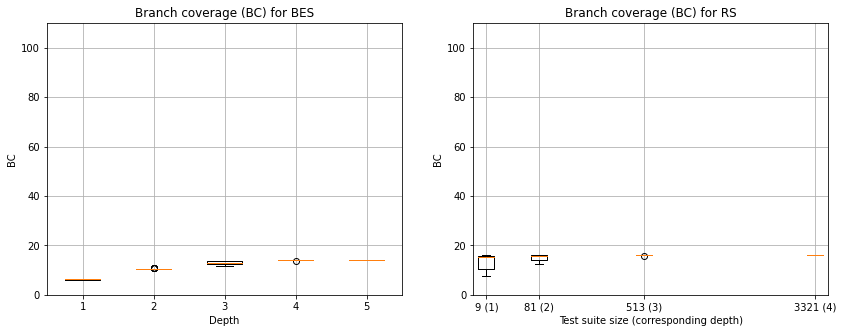

In [4]:
# bc
coverage = 'BC'  #TODO here bc are the same
data_map['bes_title'] = f'Branch coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Branch coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

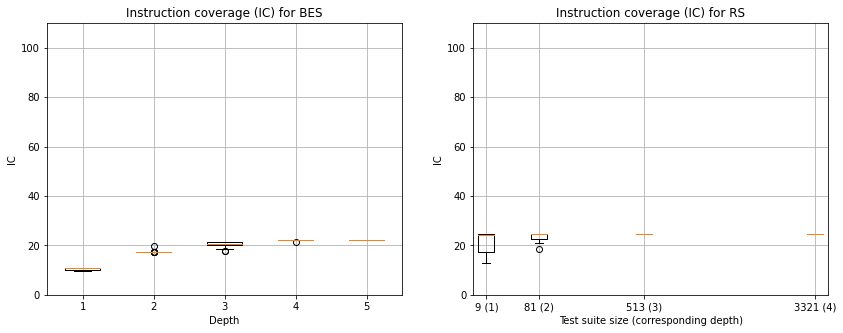

In [5]:
# ic
coverage = 'IC'
data_map['bes_title'] = f'Instruction coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Instruction coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

depth 1 --> [9]
depth 2 --> [81]
depth 3 --> [513]
depth 4 --> [3321]
depth 5 --> [22661, 22665, 22668, 22670, 22671, 22673, 22674, 22677, 22680, 22681, 22682, 22684, 22685, 22687, 22688, 22692, 22693, 22698, 22700, 22704, 22705, 22708, 22710, 22711, 22712]


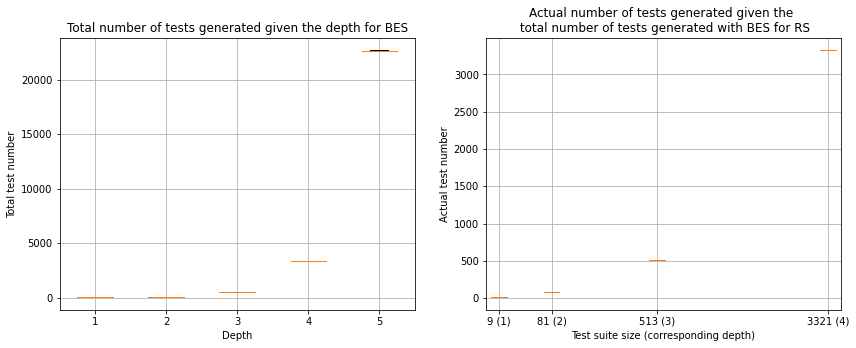

In [6]:
# total_test
creteria = 'total_tests'
data_map['need_y_limit'] = False
        
        
data_map['bes_title'] = f'Total number of tests generated given the depth for BES'
data_map['y_bes_label'] = 'Total test number'
# 'width_ratio': 1
data_map['distance_to_figures'] = 1.05

data_map['rand_title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
data_map['y_rand_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)

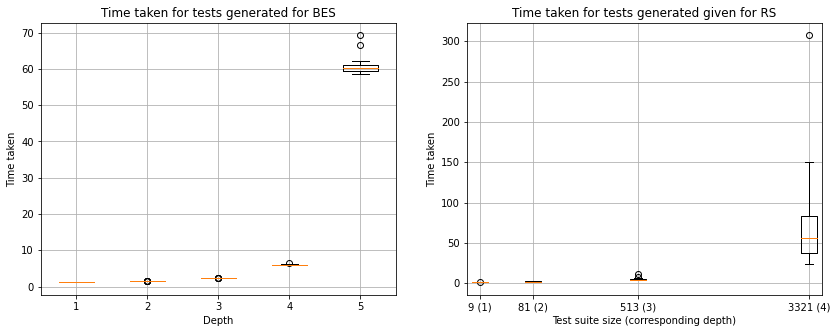

In [7]:
# time_taken
creteria = 'time_taken'
data_map['bes_title'] = f'Time taken for tests generated for BES'
data_map['y_bes_label'] = 'Time taken'
data_map['distance_to_figures'] = 1

data_map['rand_title'] = f'Time taken for tests generated given for RS'
data_map['y_rand_label'] = 'Time taken'
data_map['width_bes_ratio']: 1

time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
# print_map(time_taken, 'depth')
    
compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



trie_total   : [9, 81, 729, 6561, 59049]
actual before: [9, 81, 513, 3321, 22661]
actual after : [9, 81, 513, 3321, 22661]
**********************
\begin{table}[trie vs actual]
\begin{tabular}{|c||c|c|}
\hline
& Depth & Total number of tests generated by the trie & Actual number of tests generated by Modbat \\ \hline \hline
1 & 9 & 9  \\ \hline
2 & 81 & 81  \\ \hline
3 & 729 & 513  \\ \hline
4 & 6561 & 3321  \\ \hline
5 & 59049 & 22661  \\ \hline
\end{tabular}
\end{table}
**********************


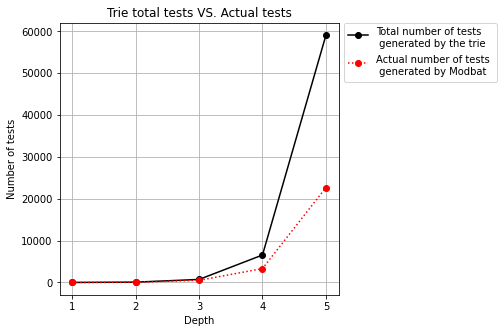

In [8]:
# trie vs actual
y1 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'trie_total_path')
print(f'trie_total   : {y1}')
y2 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'total_tests')
print(f'actual before: {y2}')
# y2[7] = 2858
print(f'actual after : {y2}')


print("**********************")
latex = to_latex_compare('trie vs actual', u_bes, y1, y2)
print(latex)
print("**********************")




data_map['bes_title'] = f'Trie total tests VS. Actual tests'
data_map['x_bes_label'] = 'Depth'
data_map['y_bes_label'] = 'Number of tests'

data_map['y1_label'] = 'Total number of tests \n generated by the trie'
data_map['y2_label'] = 'Actual number of tests \n generated by Modbat'


plot_one_linear(u_bes, y1, y2, data_map)


[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [1 2 3 4 5]
u_random: [   9   81  507 3234]


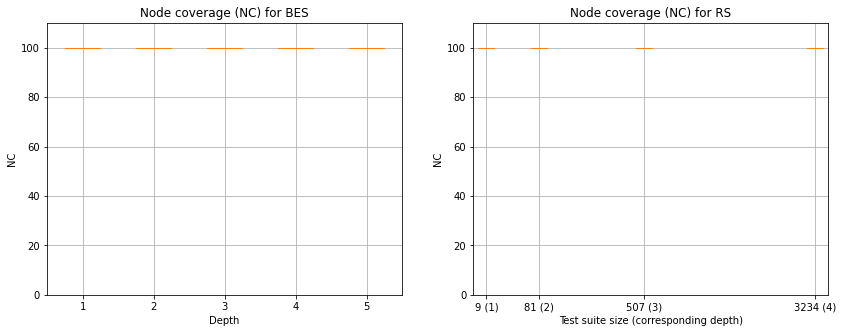

In [9]:
loopOpt = True

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
data_map['loopOpt'] = bool_to_str(loopOpt)
data_map['need_y_limit'] = True

# data_map['positions'] =   [1, 2.5, 4.5, 7, 10, 13.5, 17.5, 22]
coverage ='NC'

data_map['bes_title'] = f'Node coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage

data_map['rand_title'] = f'Node coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, data_map)
    

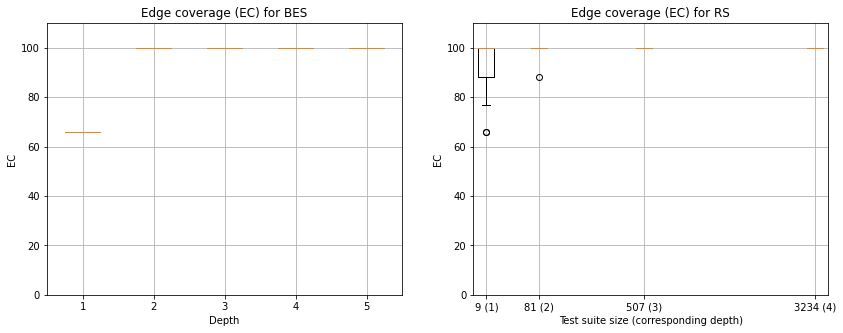

In [10]:
# ec 
coverage = 'EC'
data_map['bes_title'] = f'Edge coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Edge coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, data_map)



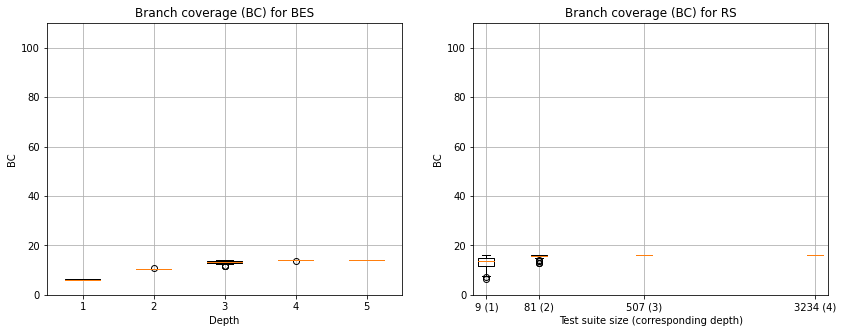

In [11]:
# bc
coverage = 'BC'  #TODO here bc are the same
data_map['bes_title'] = f'Branch coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Branch coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

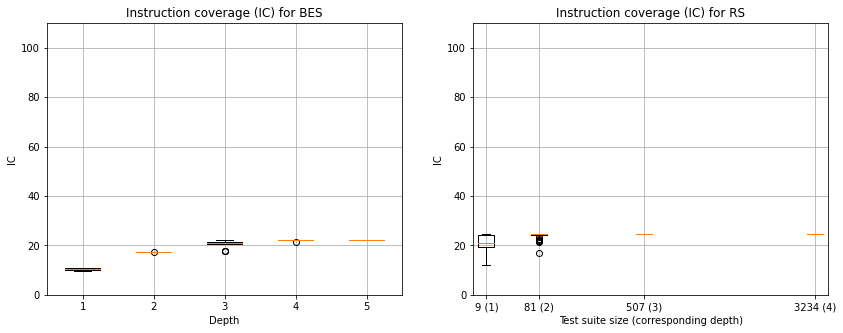

In [12]:
# ic
coverage = 'IC'
data_map['bes_title'] = f'Instruction coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Instruction coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

depth 1 --> [9]
depth 2 --> [81]
depth 3 --> [507]
depth 4 --> [3234]
depth 5 --> [21654, 21655, 21657, 21659, 21661, 21663, 21666, 21670, 21674, 21677, 21679, 21683, 21684, 21687, 21688, 21691, 21694, 21697, 21698, 21709]


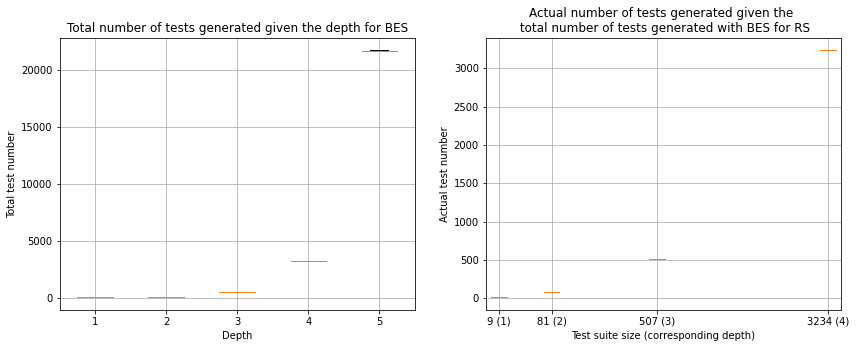

In [13]:
# total_test
creteria = 'total_tests'
data_map['need_y_limit'] = False

data_map['bes_title'] = f'Total number of tests generated given the depth for BES'
data_map['y_bes_label'] = 'Total test number'
# 'width_ratio': 1
data_map['distance_to_figures'] = 1.05

data_map['rand_title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
data_map['y_rand_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



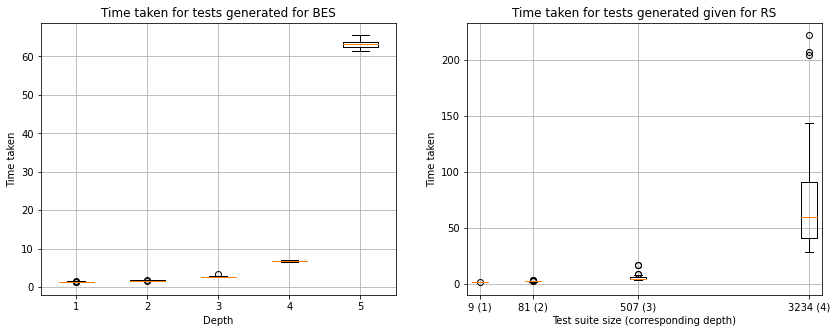

In [14]:
# time_taken
creteria = 'time_taken'
data_map['bes_title'] = f'Time taken for tests generated for BES'
data_map['y_bes_label'] = 'Time taken'
data_map['distance_to_figures'] = 1

data_map['rand_title'] = f'Time taken for tests generated given for RS'
data_map['y_rand_label'] = 'Time taken'
data_map['width_rand_ratio']: 1
    
time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
# print_map(time_taken, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



trie_total   : [9, 81, 720, 6408, 57024]
actual before: [9, 81, 507, 3234, 21654]
actual after : [9, 81, 507, 3234, 21654]
**********************
\begin{table}[trie vs actual]
\begin{tabular}{|c||c|c|}
\hline
& Depth & Total number of tests generated by the trie & Actual number of tests generated by Modbat \\ \hline \hline
1 & 9 & 9  \\ \hline
2 & 81 & 81  \\ \hline
3 & 720 & 507  \\ \hline
4 & 6408 & 3234  \\ \hline
5 & 57024 & 21654  \\ \hline
\end{tabular}
\end{table}
**********************


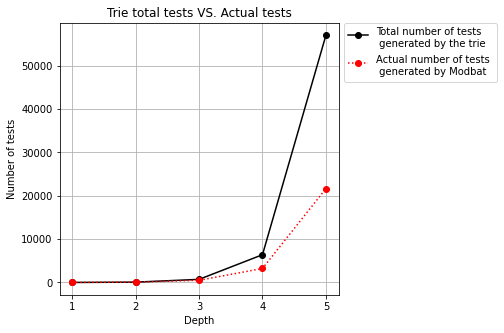

In [15]:
# trie vs actual
y1 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'trie_total_path')
print(f'trie_total   : {y1}')
y2 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'total_tests')
print(f'actual before: {y2}')
# y2[7] = 2858
print(f'actual after : {y2}')


print("**********************")
latex = to_latex_compare('trie vs actual', u_bes, y1, y2)
print(latex)
print("**********************")




data_map['bes_title'] = f'Trie total tests VS. Actual tests'
data_map['x_bes_label'] = 'Depth'
data_map['y_bes_label'] = 'Number of tests'

data_map['y1_label'] = 'Total number of tests \n generated by the trie'
data_map['y2_label'] = 'Actual number of tests \n generated by Modbat'


plot_one_linear(u_bes, y1, y2, data_map)


In [16]:
# have a list of uniques depthes
# then for each depth a box plot of coverage of it and the corresponding depth



#make sure that the random didn't get a timeout before a depth





